<a href="https://colab.research.google.com/github/mohith17/tada/blob/main/U1_C_to_F_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 horizontal lines, in your book means the topic related to that feild is written or done in collab :)

In [1]:
print("Heads up!")

Heads up!


now, i am going to work on the first model which will learn the conversion of c to f, like ya it is cool... f = c*1.8 + 32


but we are not gonna use the fomula, instead we use the ml from tf :)

first importing tf, (and it is better to tell tf to only log error messages ^_^)

In [2]:
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

#prev*2 line is little diff, in tfv2 the following has been made "tf.logging to tf.compat.v1.logging"
# NOTE: This fix does not work for bert-as-a-service. – 
# Lucas Azevedo
#  Mar 2, 2021 at 14:55
#for ref "https://stackoverflow.com/questions/55318626/module-tensorflow-has-no-attribute-logging"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np

Setting up trainning data:

In [3]:
celsius_q = np.array( [ -40, -10, 0, 8, 15, 22, 38 ], dtype=float )
fahrenheit_a = np.array( [ -40, 14, 32, 46, 59, 72, 100 ], dtype=float )

for i,c in enumerate(celsius_q):
  print( "{} degree Celsius = {} degree Farenheit".format(c, fahrenheit_a[i] ) )

-40.0 degree Celsius = -40.0 degree Farenheit
-10.0 degree Celsius = 14.0 degree Farenheit
0.0 degree Celsius = 32.0 degree Farenheit
8.0 degree Celsius = 46.0 degree Farenheit
15.0 degree Celsius = 59.0 degree Farenheit
22.0 degree Celsius = 72.0 degree Farenheit
38.0 degree Celsius = 100.0 degree Farenheit


okay know this, 
I/P are called "features"
O/P are called "labels"
Pairs we use to train are called "examples"

Creating a model, 
which will have single dense layer 
you can see 1 as input which in this case is c values,
units specify how many internal variables (a.k.a weights) the model has...

more details in future, just remember the word units.

In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

Assemble layers into model,

the sequential model definition takes a list of layers as aruguments, specifying the caliculation order from the input to output.

In [5]:
model = tf.keras.Sequential([l0])

note : we often see the layers directly defined in model rather than pre defining. but good to follow.

Next step :: is to COMPILE THE MODEL

here we specify 2 parameters, loss function and optimizer function.
tf uses them during trainin to find the best model.

finding best model involves numerical annalysis, and tf encapsulates all the complexity going on ...

for this kinda prob, we can specify the ms-error and adam optimizer, 
the 0.1 is called the learning rate, (it tells how aggresively it shd find the best model, any value between 0.1 to 0.001 ->  (will make sense))

In [6]:
#model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
#i just want to take the learning rate to 0.001
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))

Next step :: TRAIN THE MODEL

we use the "fit" method, here the weights are intially set to random, and the diff btw actual and desired output will be caliculated by the loss function and ooptimizer directs how the weights shd be adjusted.

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Done training")

Done training


1 epoch is full iteration of the examples we gave,
so now we have 7 examples, the model will train 3500 examples;

also to the future mohith i know u remember this verbose=False meaning hinding the unnecessary info, like give easy out

if it is not set we will get an additional output as 

Epoch 1/500

1/1 [==============================] - 0s 11ms/step - loss: 4997.6177


Epoch 2/500

1/1 [==============================] - 0s 10ms/step - loss: 4994.7471

Model is done!!!

Now let's see some MODEL STATASTICS.

using matplotlib

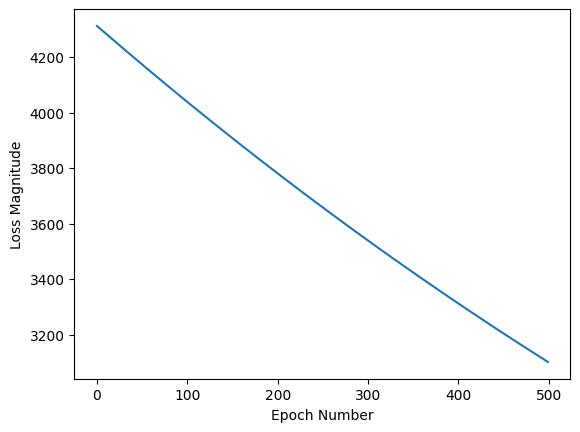

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

wowww,, we got a straight line cause we used the optimizer value as 0.001

let's see for when we use 0.1 ^_^

Done training


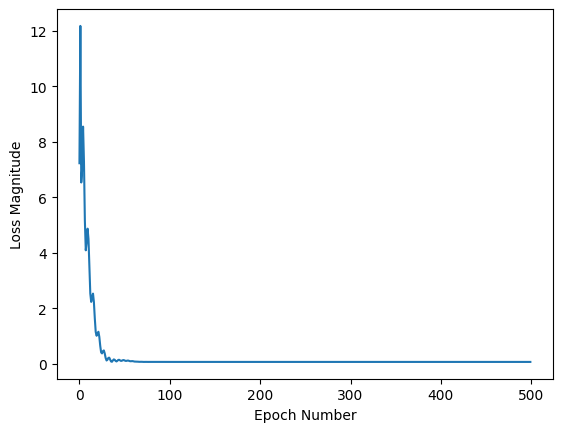

In [10]:
#This code block is used just for sample not related to main model

model_temp = tf.keras.Sequential([l0])
model_temp.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history_temp = model_temp.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Done training")
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history_temp.history['loss'])

not a regular drop but we end up with the results, also you can observe the error raising too...

Next step :: USING THE MODEL

we use the predict method,, lets predict for 100c, 200c,. (i'll update the ans after done) 

In [15]:
print(model.predict([100.0]))
print(model.predict([200.0], verbose=False))

1/1 [==============================] - 0s 33ms/step
[[211.74744]]
[[391.54233]]


well the answes are :

1/1 [==============================] - 0s 33ms/step  (this line cause of verbose is default True)

[[211.74744]]   actually 212 very close,

[[391.54233]]   it is 392 very close lol.

maybe i found the actual values lollll <3 okayyyy gn

***

now the fun part, we can now print the internal variables/weights of our dense layers... by exe the following

layer_name.get_weights()

In [16]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.7979491]], dtype=float32), array([31.952524], dtype=float32)]


we can see 2 values "1.7979491" and "31.952524"

loll, do u remeber the formulae?? f = c * 1.8 + 32

this model is gooood,, 

*** ***

we are dealing with ml, how is it fun if it is normalll....so let's do another exeperiment.

In [18]:
l1 = tf.keras.layers.Dense(units=4, input_shape=[1])
l2 = tf.keras.layers.Dense(units=4)
l3 = tf.keras.layers.Dense(units=1)

model2 = tf.keras.Sequential([l1,l2,l3])

model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))

model2.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Training done")

print("for 100c the model predicts the f as : " + str(model.predict([100.0], verbose=False)))
print("for 200c the model predicts the f as : " + str(model.predict([200.0], verbose=False)))
print("\n\n\n")
print("These are the layer variables of layer l1: \n {}".format(l1.get_weights()))
print("These are the layer variables of layer l2: \n {}".format(l2.get_weights()))
print("These are the layer variables of layer l3: \n {}".format(l3.get_weights()))

Training done
for 100c the model predicts the f as : [[211.74744]]
for 200c the model predicts the f as : [[391.54233]]




These are the layer variables of layer l1: 
 [array([[-0.5525095 ,  0.24861474,  1.2130418 , -0.5823168 ]],
      dtype=float32), array([-0.55542964,  0.6054104 ,  0.58329403,  0.41508132], dtype=float32)]
These are the layer variables of layer l2: 
 [array([[-0.65932673,  0.27493665, -0.079199  , -0.67849916],
       [ 0.53705156, -0.04416859, -1.1753227 ,  1.1004804 ],
       [-0.24047796,  0.11139627, -0.7706167 ,  1.0225854 ],
       [ 0.4167985 ,  0.3800055 , -0.4620046 ,  0.5510567 ]],
      dtype=float32), array([ 0.3414678 ,  0.4036775 , -0.52673876,  0.4935675 ], dtype=float32)]
These are the layer variables of layer l3: 
 [array([[ 0.15282533],
       [ 0.6120002 ],
       [-0.60846865],
       [ 1.0600809 ]], dtype=float32), array([0.43593702], dtype=float32)]


Broo...... the complexity of the above thing is toooooo much lol,

but nahhh, like i learned the thing about this is it is trying to figure out the best model,

like it has given a matrix like we said in layers and filling it with values until we are getting the answer and moving forward

maybe it is still in the format of y=mx+c

but the values of m and c are matrix of order 4*4*1 i guess ---> (let's see what future hold)

## Kinda glossary lol

Feature: The input(s) to our model

Examples: An input/output pair used for training

Labels: The output of the model

Layer: A collection of nodes connected together within a neural network.

Model: The representation of your neural network

Dense and Fully Connected (FC): Each node in one layer is connected to each node in the previous layer.

Weights and biases: The internal variables of model

Loss: The discrepancy between the desired output and the actual output

MSE: Mean squared error, a type of loss function that counts a small number of large discrepancies as worse than a large number of small ones.

Gradient Descent: An algorithm that changes the internal variables a bit at a time to gradually reduce the loss function.

Optimizer: A specific implementation of the gradient descent algorithm. (There are many algorithms for this. In this course we will only use the “Adam” Optimizer, which stands for ADAptive with Momentum. It is considered the best-practice optimizer.)

Learning rate: The “step size” for loss improvement during gradient descent.

Batch: The set of examples used during training of the neural network

Epoch: A full pass over the entire training dataset

Forward pass: The computation of output values from input

Backward pass (backpropagation): The calculation of internal variable adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.